# Laboratorium 3
Konrad Dębiec

## Zadanie 1

Generowanie danych oraz rysowanie węzłów

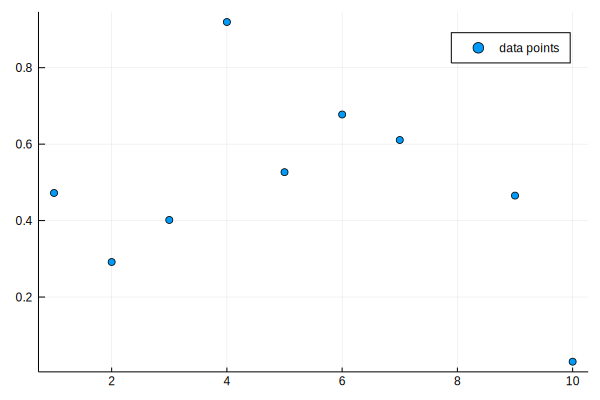

In [67]:
using Plots
xs = 1:1:10
A = [rand() for x in xs]
xsf = 1:0.01:10
scatter(xs, A, label="data points")

Własna implementacja interpolacji wielomianowej ze wzoru na wielomian interpolacyjny Lagrange'a

In [68]:
function MultinomialInterpolation(xs, ys, x)
    y = 0.0
    
    for i in 1:length(xs)
        t = 1.0
        for j in 1:length(xs)
            if j != i
                t = t*((x - xs[j])/(xs[i] - xs[j]))
            end
        end
        y += t*ys[i]
    end
    
    return y
end

MultinomialInterpolation (generic function with 1 method)

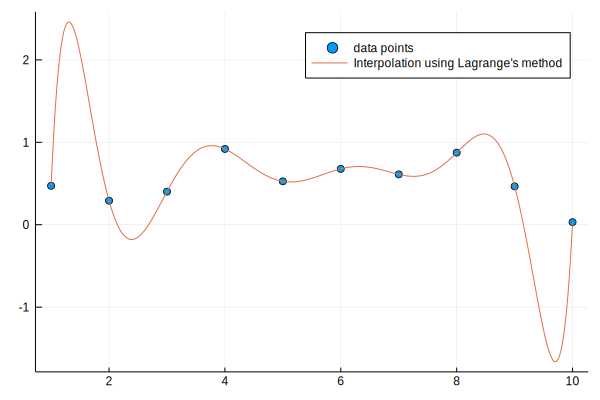

In [69]:
B = [MultinomialInterpolation(xs, A, x) for x in xsf]
plot!(xsf,B, label="Interpolation using Lagrange's method")

## Zadanie 2

In [70]:
function NewtonInterpolation(xs, ys)
    a::Int64 = length(xs)*(length(xs)+1)/2
    f = zeros(Float64, a)
    
    for i in 1:length(xs)
        f[i] = ys[i]
    end
    
    previous_elements = length(xs)
    # iteracja po rzędach, zaczynając od f(x_i) (rzędu 1)
    for row in 1:length(xs)
        # iteracja po elementach w rzędzie
        for element in 1:(length(xs)-row)
             f[previous_elements + element] = (f[previous_elements + element - (length(xs)-row+1) + 1] 
                - f[previous_elements + element - (length(xs)-row+1)])/(xs[element + row] - xs[element])
        end
        previous_elements += length(xs)-row
    end
    
    return function newt(x)
        P = f[1]
        y = 1
        for degree in 1:length(xs)-1
            w = 1.0
            
            for j in 1:degree
                w *= (x - xs[j])
            end
        
            y += length(xs) + 1 - degree
            P += f[y]*w
        end
        return P
    end
end

NewtonInterpolation (generic function with 1 method)

## Zadanie 3

Wykres wielomianu wyznaczonego metodą Newtona

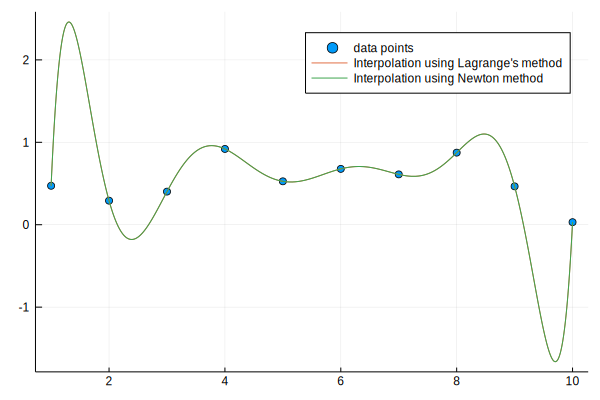

In [71]:
newt = NewtonInterpolation(xs, A)
B = [newt(x) for x in xsf]
plot!(xsf,B, label="Interpolation using Newton method")

## Zadanie 4

Interpolacja wielomianowa z pakietu Polynomials oraz wykres wszystkich interpolacji

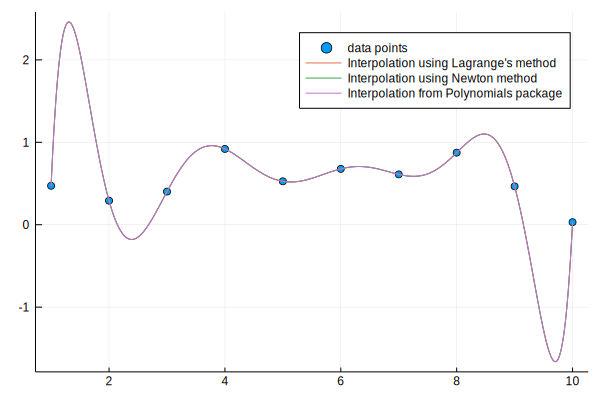

In [72]:
using Polynomials
fit1=polyfit(xs, A)
C=[fit1(x) for x in xsf]
plot!(xsf,C, label="Interpolation from Polynomials package")

Na wykresie możemy zauważyć, że wszystkie wielomianu pokrywają się na wykresie, co oznacza, że są takie same. Wynika to z twierdzenia, że dla konkretnego zadanego zbioru punktów oraz ich wartości istnieje tylko jeden możliwy wielomian stopnia n.

## Zadanie 5

Liczenie czasu wykonania poszczególnych funkcji

In [7]:
using DataFrames
times = DataFrame(size=Int[], packageTime=Float64[], packageValueInPointTime=Float64[], lagrangeTime=Float64[], newtonTime=Float64[], newtonValueInPointTime=Float64[])

,size,packageTime,packageValueInPointTime,lagrangeTime,newtonTime,newtonValueInPointTime
,Int64,Float64,Float64,Float64,Float64,Float64


In [8]:
using Polynomials

for size in 10:50:300
    for i in 1:10
        xs = 1:1:size
        ys = [rand() for x in xs]
        xsf = 1:0.01:size
        
        # Czas wyliczania wielomianu przy użyciu paczki Polynomials
        startTime = time()
        fit1=polyfit(xs, ys)
        endTime = time()
        packageDur = endTime - startTime
        
        # Czas wyliczania wartości w punkcie przy użyciu paczki Polynomials
        startTime = time()
        A = [fit1(x) for x in xsf]
        endTime = time()
        packageValueInPointDur = endTime - startTime
        
        # Czas wyliczenia wielomianu i wartości w punkcie metodą Lagrange'a
        startTime = time()
        B = [MultinomialInterpolation(xs, ys, x) for x in xsf]
        endTime = time()
        lagrangeDur = endTime - startTime
        
        # Czas wyliczania wielomianu metodą Newton'a
        startTime = time()
        newt = NewtonInterpolation(xs, ys)
        endTime = time()
        newtonDur = endTime - startTime
        
        # Czas wyliczania wartości w punkcie metodą Newton'a
        startTime = time()
        C = [newt(x) for x in xsf]
        endTime = time()
        newtonValueInPointDur = endTime - startTime
        
        push!(times, (size, packageDur, packageValueInPointDur, lagrangeDur, newtonDur, newtonValueInPointDur))
    end
end

In [9]:
using Statistics

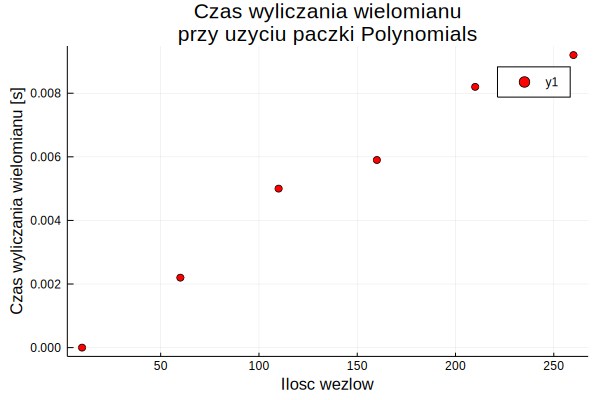

In [10]:
# Agregacja danych po ilości węzłów
# oraz wyliczenie średniej i odchylenia standarowego
packageAggregation = by(times, 
    :size, 
    :packageTime => mean, 
    :packageTime => var )
plt1 = scatter(
    packageAggregation.size, 
    packageAggregation.packageTime_mean,
    colour = :red, 
    yerr=packageAggregation.packageTime_var, 
    title="Czas wyliczania wielomianu \nprzy uzyciu paczki Polynomials", 
    xaxis="Ilosc wezlow", 
    yaxis="Czas wyliczania wielomianu [s]")

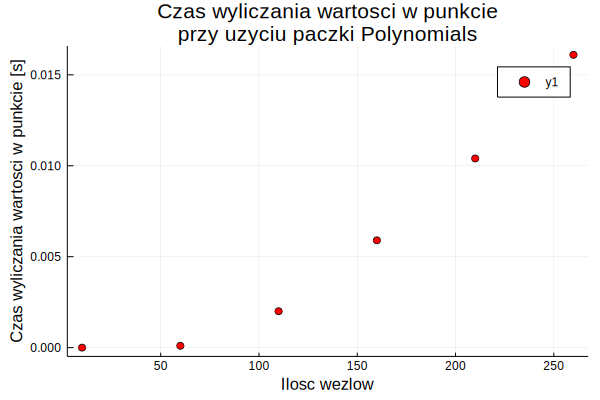

In [11]:
# Agregacja danych po ilości węzłów
# oraz wyliczenie średniej i odchylenia standarowego
packageValueInPointAggregation = by(times, 
    :size, 
    :packageValueInPointTime => mean, 
    :packageValueInPointTime => var )
plt2 = scatter(
    packageValueInPointAggregation.size, 
    packageValueInPointAggregation.packageValueInPointTime_mean,
    colour = :red, 
    yerr=packageValueInPointAggregation.packageValueInPointTime_var, 
    title="Czas wyliczania wartosci w punkcie \nprzy uzyciu paczki Polynomials", 
    xaxis="Ilosc wezlow", 
    yaxis="Czas wyliczania wartosci w punkcie [s]")

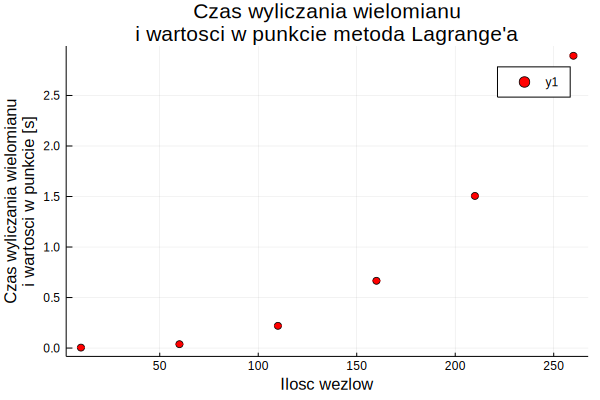

In [12]:
# Agregacja danych po ilości węzłów
# oraz wyliczenie średniej i odchylenia standarowego
lagrangeAggregation = by(times, 
    :size, 
    :lagrangeTime => mean, 
    :lagrangeTime => var )
plt3 = scatter(
    lagrangeAggregation.size, 
    lagrangeAggregation.lagrangeTime_mean,
    colour = :red, 
    yerr=lagrangeAggregation.lagrangeTime_var, 
    title="Czas wyliczania wielomianu \ni wartosci w punkcie metoda Lagrange'a", 
    xaxis="Ilosc wezlow", 
    yaxis="Czas wyliczania wielomianu \ni wartosci w punkcie [s]")

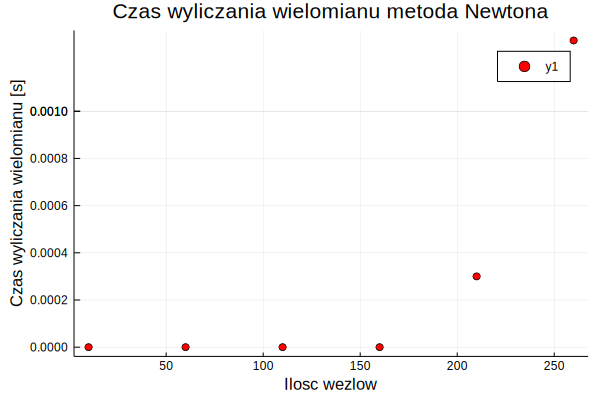

In [13]:
# Agregacja danych po ilości węzłów
# oraz wyliczenie średniej i odchylenia standarowego
newtonAggregation = by(times, 
    :size, 
    :newtonTime => mean, 
    :newtonTime => var )
plt4 = scatter(
    newtonAggregation.size, 
    newtonAggregation.newtonTime_mean,
    colour = :red, 
    yerr=newtonAggregation.newtonTime_var, 
    title="Czas wyliczania wielomianu metoda Newtona", 
    xaxis="Ilosc wezlow", 
    yaxis="Czas wyliczania wielomianu [s]")

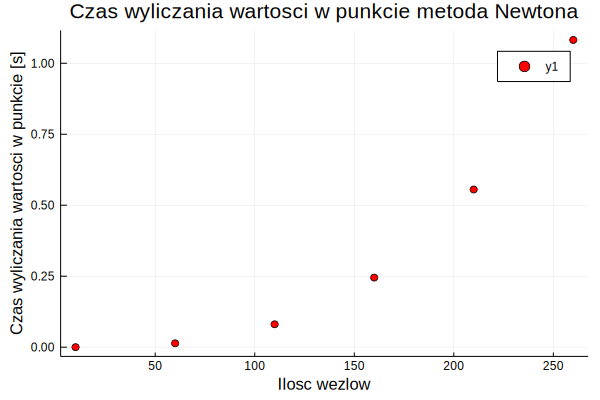

In [14]:
# Agregacja danych po ilości węzłów
# oraz wyliczenie średniej i odchylenia standarowego
newtonValueInPointAggregation = by(times, 
    :size, 
    :newtonValueInPointTime => mean, 
    :newtonValueInPointTime => var )
plt5 = scatter(
    newtonValueInPointAggregation.size, 
    newtonValueInPointAggregation.newtonValueInPointTime_mean,
    colour = :red, 
    yerr=newtonValueInPointAggregation.newtonValueInPointTime_var, 
    title="Czas wyliczania wartosci w punkcie metoda Newtona", 
    xaxis="Ilosc wezlow", 
    yaxis="Czas wyliczania wartosci w punkcie [s]")

## Zadanie 6

In [26]:
using Interpolations

┌ Info: Precompiling Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59]
└ @ Base loading.jl:1260


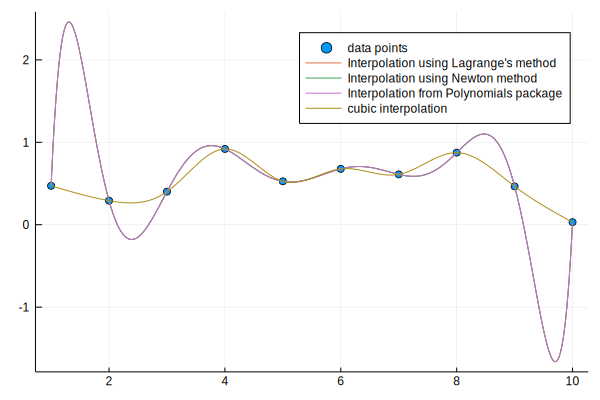

In [73]:
interp_cubic = CubicSplineInterpolation(xs, A)
B2=[interp_cubic(x) for x in xsf]
plot!(xsf,B2, label="cubic interpolation")

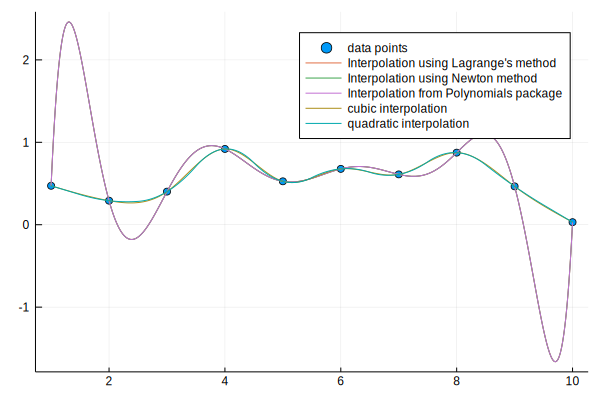

In [74]:
itp = interpolate(A, BSpline(Quadratic(Line(OnCell()))))
C2=[itp(x) for x in xsf]
plot!(xsf,C2, label="quadratic interpolation")

Na powyższych wykresach możemy zauważyć, że interpolacja funkcjami sklejanymi jest wyraźnie dokładniejsza od wielomianowej.

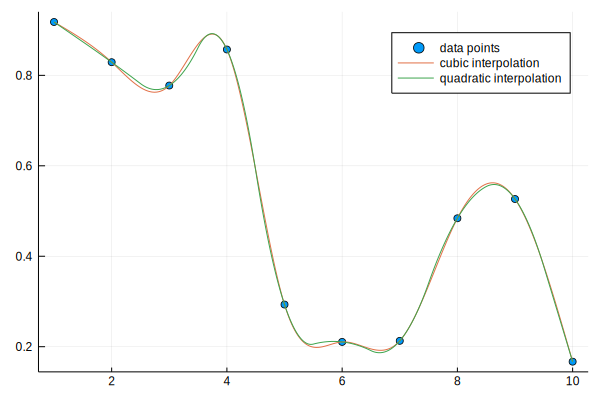

In [76]:
xs = 1:1:10
A = [rand() for x in xs]
xsf = 1:0.01:10

scatter(xs, A, label="data points")

interp_cubic = CubicSplineInterpolation(xs, A)
B2=[interp_cubic(x) for x in xsf]
plot!(xsf,B2, label="cubic interpolation")
itp = interpolate(A, BSpline(Quadratic(Line(OnCell()))))
C2=[itp(x) for x in xsf]
plot!(xsf,C2, label="quadratic interpolation")

Przyglądając się bliżej wykresowi interpolacji kwadratowej oraz sześciennej możemy zauważyć delikatne różnice między nimi, jednak są one prawie niezauważalne. Ponieważ interpolacja sześcienna ma również ciągłą drugą pochodną, jej wykres jest bardziej wygładzony.

## Zadanie 7

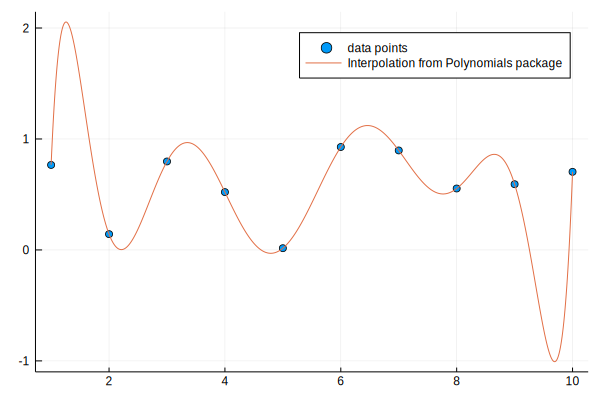

In [2]:
using Plots
using Polynomials
xs = 1:1:10
A = [rand() for x in xs]
xsf = 1:0.01:10
scatter(xs, A, label="data points")

fit1=polyfit(xs, A)
C=[fit1(x) for x in xsf]
plot!(xsf,C, label="Interpolation from Polynomials package")

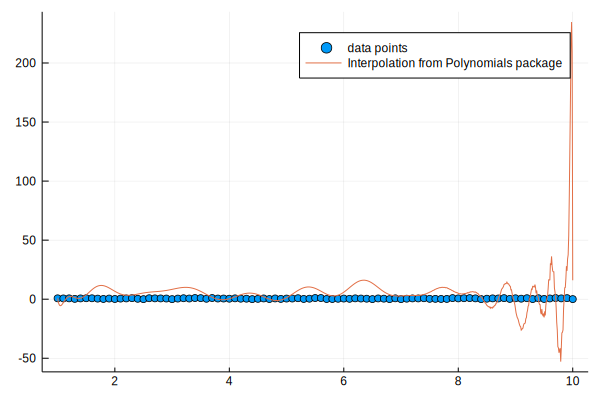

In [3]:
using Plots
using Polynomials
xs = 1:0.1:10
A = [rand() for x in xs]
xsf = 1:0.01:10
scatter(xs, A, label="data points")

fit1=polyfit(xs, A)
C=[fit1(x) for x in xsf]
plot!(xsf,C, label="Interpolation from Polynomials package")

Na powyższych wykresach możemy zauważyć efekt Rungego. Po zwiększeniu ilości węzłów wyraźnie pogorszyła się jakość interpolacji wielomianowej.